# 4. 데이터를 한 눈에! Visualization

## 4-1. 들어가며

### 학습 목표
---
- 파이썬 라이브러리(Pandas, Matplotlib, Seaborn)를 이용해서 여러 가지 그래프를 그리는 법을 학습합니다.
- 실전 데이터셋으로 직접 시각화해보며 데이터 분석에 필요한 탐색적 데이터 분석(EDA)을 하고 인사이트를 도출해 봅니다.

### 학습 목차
---
1. 파이썬으로 그래프를 그린다는 건?
2. 간단한 그래프 그리기
3. 그래프 4대 천왕: 막대그래프, 선그래프, 산점도, 히스토그램
4. 시계열 데이터 시각화하기
5. Heatmap

## 4-2. 파이썬으로 그래프를 그린다는 건?

### 준비물
---
환경 설치 확인

```c
$ pip list | grep matplotlib
$ pip list | grep seaborn
```

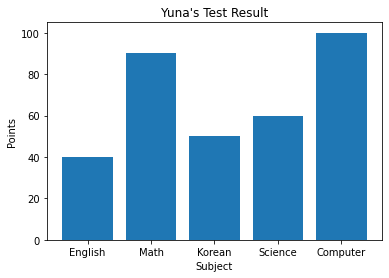

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

## 4-3. 간단한 그래프 그리기(1) 막대그래프 그려보기

### 데이터 정의
---

In [9]:
import matplotlib.pyplot as plt
# IPython에서 사용하는 매직 메서드.
# Rich output : (그래프, 소리 등과 같은 결과물)에 대한 표현 방식
%matplotlib inline

# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

### 축 그리기
---

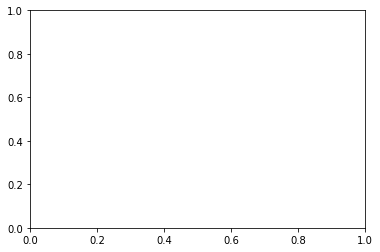

In [10]:
# 축 그리기
fig = plt.figure() #도화지(그래프) 객체 생성
ax1 = fig.add_subplot(1,1,1) #figure()객체에 add_subplot 메서드를 이용해 축을 그려준다.

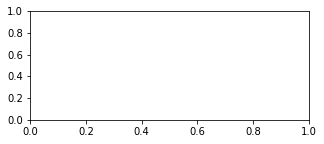

In [11]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

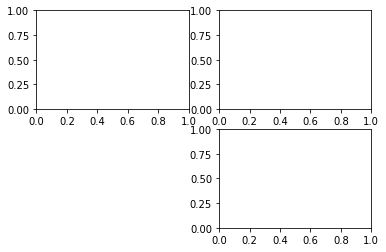

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

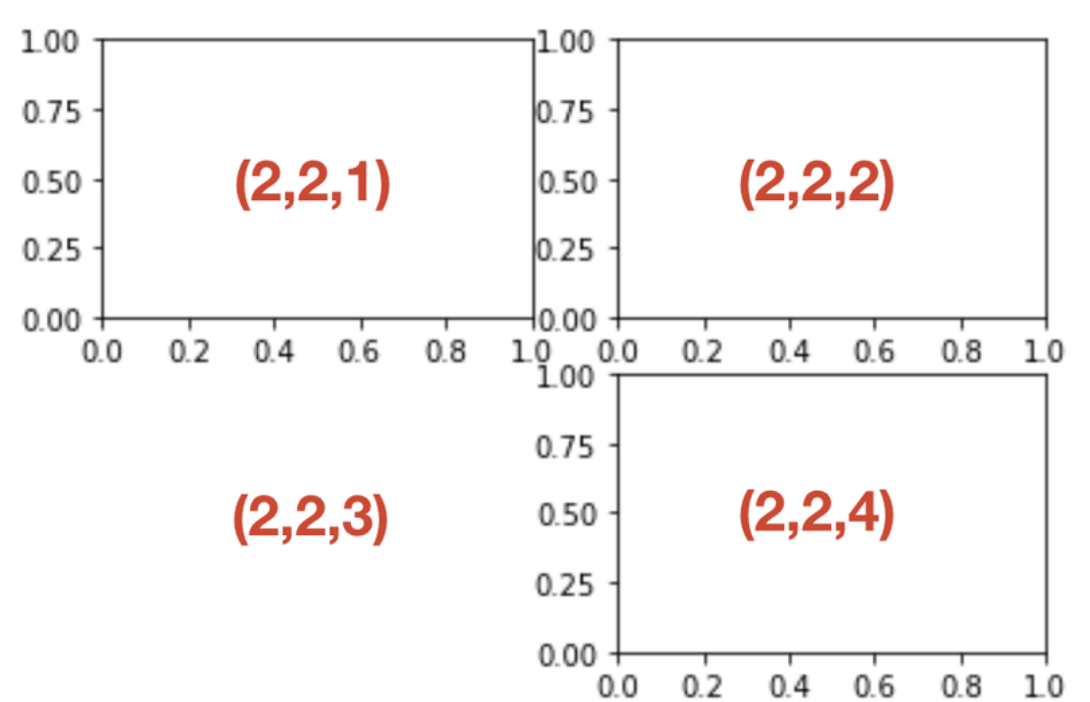

<BarContainer object of 5 artists>

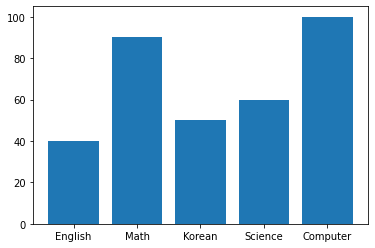

In [13]:
# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

### 그래프 요소 추가
---

***label, title***

In [ ]:
# Q. 아래 코드의 빈칸을 채워주세요.
# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar()

# 라벨, 타이틀 달기
# [[YOUR CODE]]